# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [102]:
import warnings 
warnings.filterwarnings('ignore')

In [103]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# calculate accuracy measures and confusion matrix
from sklearn import metrics

#Decision tree does not take strings as input for the model fit step so importing count vector
from sklearn.feature_extraction.text import CountVectorizer  

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [104]:
# Loading data file
wine_df = pd.read_csv("C:/Users/Tanu/Desktop/Greatleaning/3_Nov'18/External_Lab/winequality-red.csv", delimiter=',')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [105]:
# selecting 10 samples for the data & printing the output
print(wine_df.sample(10))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
634             7.9              0.35         0.21            1.90      0.073   
618            11.4              0.46         0.50            2.70      0.122   
321             9.3              0.61         0.26            3.40      0.090   
619            11.3              0.37         0.41            2.30      0.088   
999             6.4              0.69         0.00            1.65      0.055   
1446            6.9              0.63         0.02            1.90      0.078   
1088           11.6              0.41         0.54            1.50      0.095   
642             9.9              0.54         0.45            2.30      0.071   
1203            9.9              0.74         0.19            5.80      0.111   
1031            7.3              0.55         0.01            1.80      0.093   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
634                  46.0      

# Q3 Print the datatypes of each column and the shape of the dataset 

In [106]:
# datatype for each column
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [107]:
# getting the shape of data
wine_df.shape

(1599, 12)

In [108]:
#Checking if any missing value in Iris data
wine_df.isnull().values.any()

False

# Q4 Print the descriptive statistics of each & every column using describe() function

In [109]:
# Printing the descriptive statistics
print(wine_df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

In [11]:
# Using the above output of descriptive statistics & performing univariate analysis for 'Total Sulfur dioxide' & 'Density'

In [ ]:
# Total sulfur dioxide:

# Mean & median are different so this variable does not follow normal distribution
# Mean is greater than median so data shows the positive skewness
# Max observation is too high so tail is longer at right
# this variable shows high amount of variance from mean 
# variance is increasing so may hamper model later

In [ ]:
# Density:

# Mean & median are almost same so distribution may follow normal distribution
# Max observation is not high so it density plot may be symatric
# this variable showing small amount of variance from mean value
# almost constant 

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


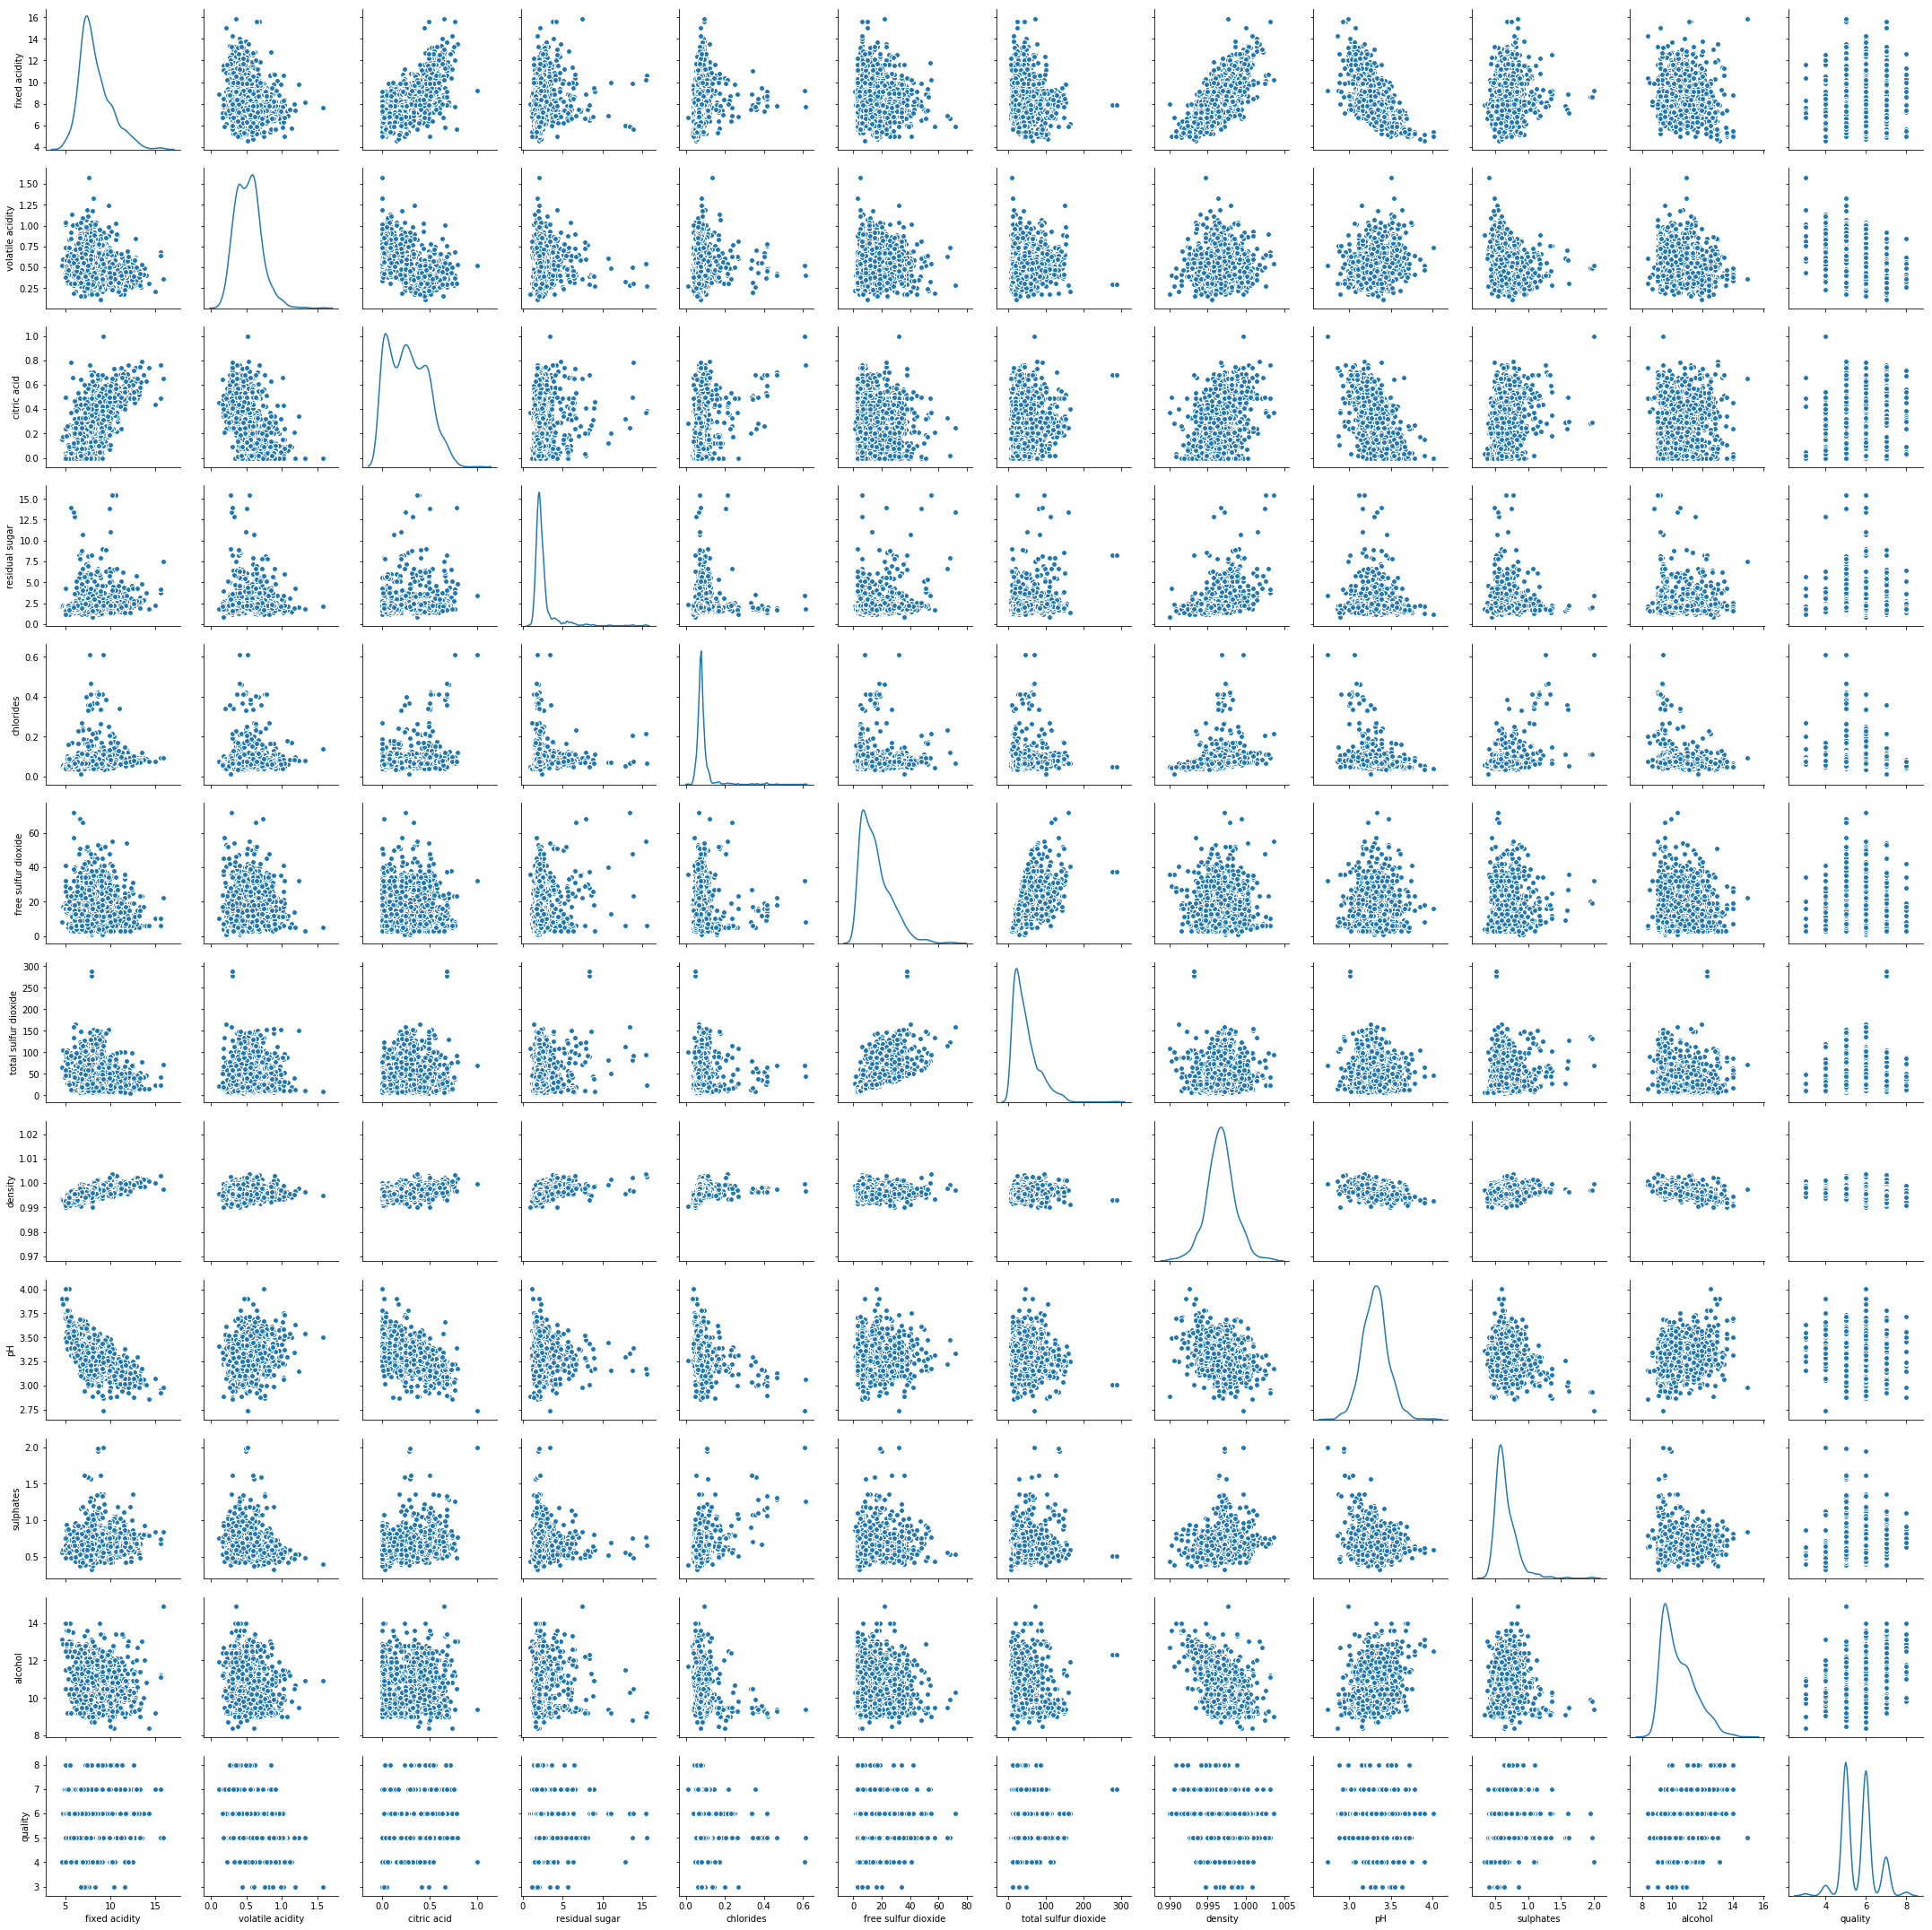

In [123]:
#Creating pairplot
sns.pairplot(wine_df, diag_kind="kde")

In [10]:
# Calculating correlation between each of the variable
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
# insights basis correlation matrix & pairplot

# Quality does not show strong linear relationship with any variable though volatile acitity & alcohal are showing a week relatioship with quality
#Few variables are correlated moderately with each other
#i.e 
#fixed acidity is weekly positively correlated with citric acid & density ; same goes between  free & sugar sulfer di oxide
# velocity acidity is negatively correlated with citric acid & ph
#Density is weekly correlated negatively with alcohal

# many variables have outiers

# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [115]:
# Treating “quality”as Dependent Variable & Creating data sets for dependent  variables

y = wine_df[['quality']]

# Seeing output
y['quality'].unique()

y.head(5)

,quality
0,5
1,5
2,5
3,6
4,5


In [116]:
# Treating rest of the variables as Independent Variables
X = wine_df.drop({'quality'}, axis=1)

# Seeing output
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [117]:
# converting the features into z scores as we do not know what units / scales were used and store them in new dataframe

X1 = X.apply(zscore)   
X1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [118]:
# splitting data into training and test set for independent attributes

from sklearn.model_selection import train_test_split

train_set, test_set, train_labels, test_labels = train_test_split(X1, y, test_size=0.30, random_state=101)

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [17]:
# Invoking the decision tree classifier function. 
#Using 'entropy' method of finding the split columns & fitting the model in training data.

                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state = 11 )

dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

In [18]:
# Model score 
dt_model.score(train_set, train_labels)

1.0

# Q9 Print the accuracy of the model & print the confusion matrix 

In [19]:
# Model accuracy 
dt_model.score(test_set, test_labels)

0.5625

In [20]:
# #Predicted values 
y_predict = dt_model.predict(test_set)

In [21]:
# Printing confusion matrix
print(metrics.confusion_matrix(test_labels, y_predict))

[[  1   2   1   1   0   0]
 [  0   2  10   7   0   0]
 [  1   7 134  60   6   0]
 [  0   3  44 110  21   2]
 [  0   3   6  25  22   7]
 [  0   0   0   0   4   1]]


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [84]:
#Regularizing the decision tree by limiting the max. depth of trees and print the accuracy

dt_model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state = 11 )

# Fitting model
dt_model1.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

In [23]:
# Model score
dt_model1.score(train_set, train_labels)

0.6353887399463807

In [24]:
# Model accuracy
dt_model1.score(test_set, test_labels)

0.5604166666666667

In [85]:
#Predicted values 
y_predict = dt_model1.predict(test_set)

# Printing confusion matrix
print(metrics.confusion_matrix(test_labels, y_predict))

[[  0   2   3   0   0   0]
 [  0   1  13   5   0   0]
 [  2   2 160  43   1   0]
 [  1   0  70  97  12   0]
 [  0   1   9  42  11   0]
 [  0   0   0   2   3   0]]


# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [80]:
#Invoking the Random Forest classifier function

rfc = RandomForestClassifier(n_estimators=20)

#Fitting model
rfc.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
# Model score
rfc.score(train_set, train_labels)

0.9964253798033958

In [67]:
# Model accuracy
rfc.score(test_set, test_labels)

0.6729166666666667

In [82]:
#Predicted values 
y_predict = rfc.predict(test_set)

# Printing confusion matrix
print(metrics.confusion_matrix(test_labels, y_predict))

[[  0   1   4   0   0   0]
 [  0   0  13   6   0   0]
 [  0   1 161  41   5   0]
 [  0   0  38 130  11   1]
 [  0   0   6  31  26   0]
 [  0   0   0   2   2   1]]


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [120]:
# Using regularized Decision tree model as base 
dt_model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state = 11 )

#Invoking the Adaboost classifier function. 
AdaBoost = AdaBoostClassifier(base_estimator= dt_model1,n_estimators= 20)

# Fitting model
AdaBoost.fit(train_set, train_labels)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best'),
          learning_rate=1.0, n_estimators=20, random_state=None)

In [121]:
# Model score
AdaBoost.score(train_set, train_labels)

0.7890974084003575

In [122]:
# Model accuracy
AdaBoost.score(test_set, test_labels)

0.5166666666666667

In [96]:
#Predicted values 
y_predict = AdaBoost.predict(test_set)

#Printing confusion matrix
print(metrics.confusion_matrix(test_labels, y_predict))

[[  0   2   2   1   0   0]
 [  0   0   9  10   0   0]
 [  0   4 103  99   2   0]
 [  0   0  41 115  24   0]
 [  0   0  12  26  25   0]
 [  0   0   0   4   0   1]]


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [46]:
# Using regularized Decision tree model as base 
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state = 11 )

In [91]:
#Invoking the Bagging classifier function. 
num_trees = 20
Bag_model = BaggingClassifier(base_estimator=dt_model, n_estimators=num_trees, random_state = 11)

# Fitting model
Bag_model.fit(train_set, train_labels)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=11, verbose=0, warm_start=False)

In [54]:
# Model score
Bag_model.score(train_set, train_labels)

0.7220732797140303

In [55]:
# Model accuracy
Bag_model.score(test_set, test_labels)

0.5770833333333333

In [92]:
#Predicted values 
y_predict = Bag_model.predict(test_set)

# Printing confusion matrix
print(metrics.confusion_matrix(test_labels, y_predict))

[[  0   1   4   0   0   0]
 [  0   0  11   8   0   0]
 [  0   3 148  55   2   0]
 [  0   1  48 107  24   0]
 [  0   0   3  38  22   0]
 [  0   0   0   2   3   0]]


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [86]:
#Invoking the Gradient Boosting classifier function. 
num_trees = 20
GB_model = GradientBoostingClassifier(n_estimators=num_trees, random_state=11)

# Fitting model
GB_model.fit(train_set, train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=11, subsample=1.0, verbose=0,
              warm_start=False)

In [87]:
# Model score
GB_model.score(train_set, train_labels)

0.7515638963360143

In [88]:
# Model accuracy
GB_model.score(test_set, test_labels)

0.6208333333333333

In [89]:
#Predicted values 
y_predict = GB_model.predict(test_set)

# Printing confusion matrix
print(metrics.confusion_matrix(test_labels, y_predict))

[[  0   1   3   1   0   0]
 [  0   1  14   4   0   0]
 [  0   5 152  49   1   1]
 [  0   2  36 127  14   1]
 [  0   0   1  43  18   1]
 [  0   0   0   3   2   0]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.